#Network Intrusion Detection


importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
#
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#
from tabulate import tabulate

In [2]:
train=pd.read_csv("/content/Train_data.csv")
test=pd.read_csv("/content/Test_data.csv")

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

We find no column to be blank

In [6]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [7]:
train.duplicated().sum()

0

In [8]:
train.duplicated().sum()

0

Checking the balance of data.

In [9]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

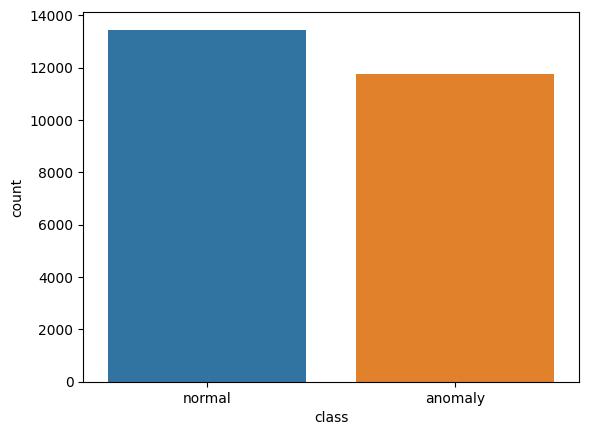

In [10]:
sns.countplot(x=train['class'])

In [11]:
train.groupby('class').mean()

<ipython-input-11-9288ed686717>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('class').mean()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
class,,,,,,,,,,,,,,,,,,,,,
anomaly,451.397002,39146.190667,2450.980158,0.000085,0.050924,0.000085,0.168441,0.001192,0.034829,0.020267,...,221.605297,29.892191,0.187225,0.13025,0.178134,0.039291,0.596063,0.591931,0.201698,0.206045
normal,177.274742,11394.413637,4400.680645,0.000074,0.000000,0.000000,0.223883,0.001190,0.709049,0.409101,...,148.415273,189.429995,0.810171,0.04088,0.120663,0.025342,0.014894,0.007349,0.044545,0.042565


In [12]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [13]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [14]:
X = train.drop(['class'], axis=1)
Y = train['class']

In [16]:
import itertools

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier()

# Initialize RFE with the classifier and the number of features to select
rfe = RFE(rfc, n_features_to_select=10)

# Fit RFE to your training data
rfe = rfe.fit(X, Y)

# Create a feature_map to map selected features to their column names
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]

# Extract the selected features
selected_features = [v for i, v in feature_map if i == True]

print(selected_features)

['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']


In [17]:
X = X[selected_features]

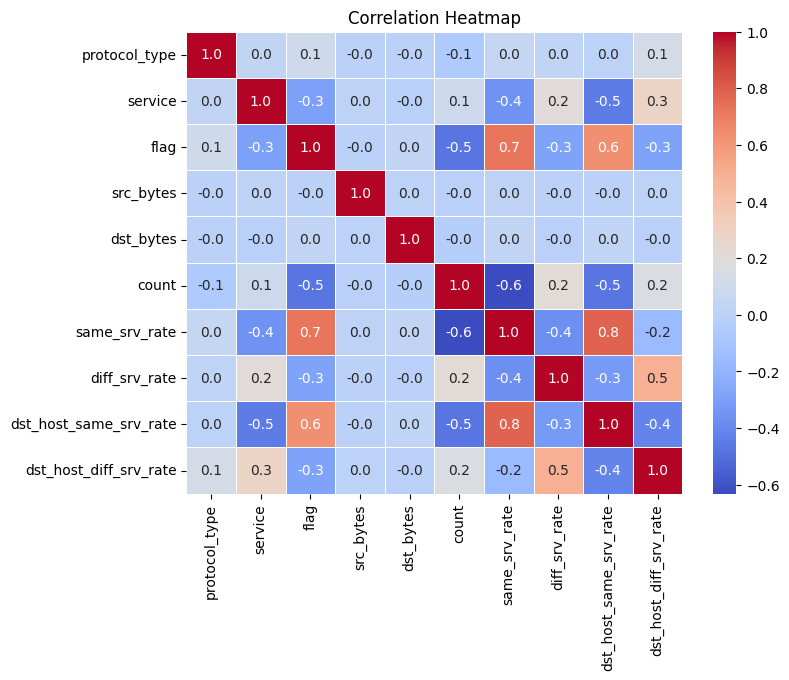

In [21]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".1f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=2)

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Logestic regression

In [22]:
lg_model = LogisticRegression(random_state = 42,C=0.1)
start_time = time.time()
lg_model.fit(X_train, Y_train)
end_time = time.time()
lg_time=end_time-start_time
print("Training time: ",lg_time )

Training time:  0.07287359237670898


In [23]:
lg_train, lg_test = lg_model.score(X_train , Y_train), lg_model.score(X_test , Y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9444747680246117
Test Score: 0.9372891446715618


# KNN

In [24]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1, 20, 2)}  # Try odd values of k
grid_search = GridSearchCV(knn, params, cv=5)
grid_search.fit(X_test, Y_test)
best_k = grid_search.best_params_['n_neighbors']

In [25]:
KNN_model = KNeighborsClassifier(n_neighbors=best_k)
start_time = time.time()
KNN_model.fit(X_train, Y_train)
end_time = time.time()
KNN_time=end_time-start_time
print("Traning time: ", KNN_time)

Traning time:  0.030072450637817383


In [26]:
KNN_train, KNN_test = KNN_model.score(X_train, Y_train), KNN_model.score(X_test, Y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9999007591921798
Test Score: 0.9902758483826156


# Decison tree

In [27]:
dt = DecisionTreeClassifier()
start_time = time.time()
dt.fit(X_train, Y_train)
end_time = time.time()
dt_time=end_time-start_time
print("Traning time: ", dt_time)

Traning time:  0.04096817970275879


In [28]:
dt_train, dt_test = dt.score(X_train, Y_train), dt.score(X_test, Y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 0.9999007591921798
Test Score: 0.9954356023020441


# Neural network

In [30]:
m,n=X_train.shape

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Set the seed for consistent results
tf.random.set_seed(1234)

# Create a Sequential model
ANN = Sequential()

# Input Layer
ANN.add(InputLayer(input_shape=(n,)))

# Hidden Layers
ANN.add(Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ANN.add(BatchNormalization())  # Adding batch normalization
ANN.add(Dropout(0.5))  # Adding dropout for regularization

ANN.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

# Output Layer
ANN.add(Dense(1, activation="linear"))  # Using sigmoid activation for binary classification

# Compile the model
ANN.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),  # Adjust learning rate as needed
    metrics=["accuracy"]  # Monitor accuracy during training
)


In [32]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [33]:
start_time = time.time()
hist=ANN.fit(X_train,Y_train,batch_size=25,epochs=100)
end_time = time.time()
ANN_time=end_time-start_time

Epoch 1/100
807/807 [==============================] - 5s 3ms/step - loss: 1.3942 - accuracy: 0.8988
Epoch 2/100
807/807 [==============================] - 2s 2ms/step - loss: 1.1098 - accuracy: 0.9254
Epoch 3/100
807/807 [==============================] - 2s 2ms/step - loss: 1.0286 - accuracy: 0.9324
Epoch 4/100
807/807 [==============================] - 2s 2ms/step - loss: 1.0171 - accuracy: 0.9327
Epoch 5/100
807/807 [==============================] - 2s 2ms/step - loss: 0.9559 - accuracy: 0.9362
Epoch 6/100
807/807 [==============================] - 2s 3ms/step - loss: 1.0723 - accuracy: 0.9232
Epoch 7/100
807/807 [==============================] - 2s 3ms/step - loss: 0.9819 - accuracy: 0.9342
Epoch 8/100
807/807 [==============================] - 2s 2ms/step - loss: 0.9192 - accuracy: 0.9391
Epoch 9/100
807/807 [==============================] - 2s 2ms/step - loss: 0.8663 - accuracy: 0.9426
Epoch 10/100
807/807 [==============================] - 2s 2ms/step - loss: 0.8454 - accura

In [34]:
print(ANN_time)

206.71567296981812


In [35]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

In [36]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0,2.0])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

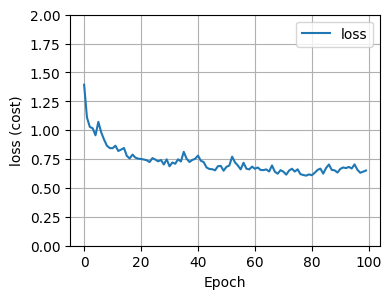

In [37]:
plot_loss_tf(hist)

In [38]:
def prd(f_x):
  ans=[]
  for i in f_x:
    if i>=0.5:
      ans.append(1)
    else:
      ans.append(0)
  return ans

In [39]:
from sklearn.metrics import accuracy_score
l_train, l_test = ANN.predict(X_train), ANN.predict(X_test)
p_train=tf.nn.sigmoid(l_train)
p_test=tf.nn.sigmoid(l_test)
ANN_train=accuracy_score(prd(p_train),Y_train)
ANN_test=accuracy_score(prd(p_test),Y_test)
print(ANN_train,ANN_test)

158/158 [==============================] - 0s 1ms/step
0.9633801419143552 0.9624925580472316


In [40]:
data = [["KNN", KNN_train, KNN_test,KNN_time],
        ["Logistic Regression", lg_train, lg_test,lg_time],
        ["Decision Tree", dt_train, dt_test,dt_time],
        ["Artificial Neural Network",ANN_train,ANN_test,ANN_time]]

col_names = ["Model", "Train Score", "Test Score","Training time"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════════════╤══════════════╤═════════════════╕
│ Model                     │   Train Score │   Test Score │   Training time │
╞═══════════════════════════╪═══════════════╪══════════════╪═════════════════╡
│ KNN                       │      0.999901 │     0.990276 │       0.0300725 │
├───────────────────────────┼───────────────┼──────────────┼─────────────────┤
│ Logistic Regression       │      0.944475 │     0.937289 │       0.0728736 │
├───────────────────────────┼───────────────┼──────────────┼─────────────────┤
│ Decision Tree             │      0.999901 │     0.995436 │       0.0409682 │
├───────────────────────────┼───────────────┼──────────────┼─────────────────┤
│ Artificial Neural Network │      0.96338  │     0.962493 │     206.716     │
╘═══════════════════════════╧═══════════════╧══════════════╧═════════════════╛
